In [68]:
import pandas as pd
import numpy as np
import sklearn.cluster
from sklearn.cross_validation import train_test_split
from mpl_toolkits.mplot3d import Axes3D

fileURL = 'iris.data.txt'
iris = pd.read_csv(fileURL, names=['SepalLength', 'Sepal Width', 'PetalLength', 'Petal Width', 'Species'], header=None) 
iris = iris.dropna()

In [69]:
# print iris

In [70]:
%pylab inline

# (c) 2014 Reid Johnson and Everaldo Aguiar
#
# Functions to work with continuous data and linear regression models.

import matplotlib.pyplot as pl

def pairs(data):
    """Generates and shows a pairwise scatterplot of the dataset features.

    A figure with nxn scatterplots is generated, where n is the number of features. The features are
    defined as the all columns excluding the final column, which is defined as the class.

    Args:
      data (array): A dataset.

    """
    i = 1

    # Divide columns into features and class.
    features = list(data.columns)
    classes = features[-1] # create class column
    del features[-1] # delete class column from feature vector

    # Generate an nxn subplot figure, where n is the number of features.
    figure = pl.figure(figsize=(5*(len(data.columns)-1), 4*(len(data.columns)-1)))
    for col1 in data[features]:
        for col2 in data[features]:
            ax = pl.subplot(len(data.columns)-1, len(data.columns)-1, i)
            if col1 == col2:
                ax.text(2.5, 4.5, col1, style='normal', fontsize=20)
                ax.axis([0, 10, 0, 10])
                pl.xticks([]), pl.yticks([])
            else:
                for name in data[classes]:
                    cond = data[classes] == name
                    ax.plot(data[col2][cond], data[col1][cond], linestyle='none', marker='o', label=name)
                #t = plt.title(name)
            i += 1

    pl.show()

Populating the interactive namespace from numpy and matplotlib


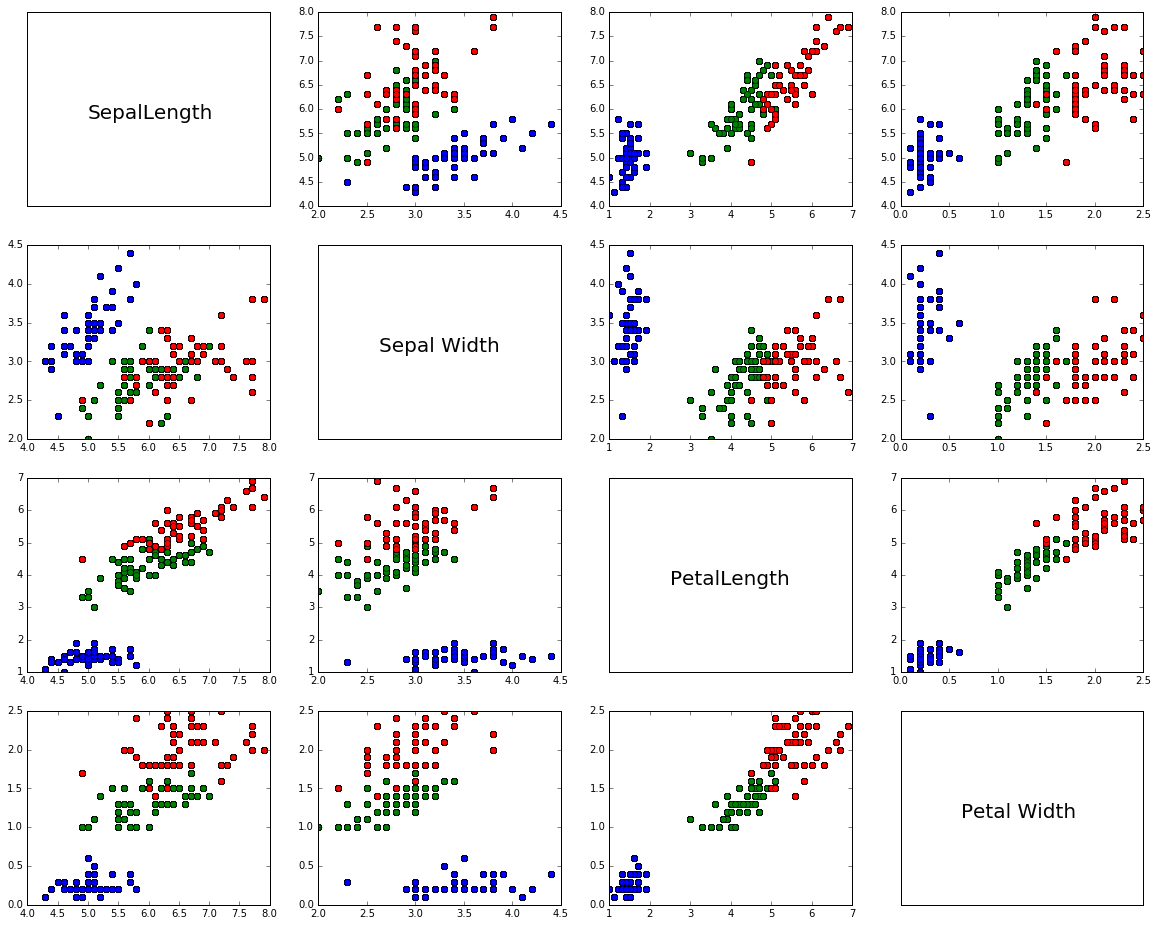

In [71]:
pairs(iris)

In [100]:
print(__doc__)


# Code source: Jaques Grobler
# License: BSD 3 clause

import numpy as np
from sklearn import datasets, linear_model

iris = datasets.load_iris()

def linearReg(iris, index1, index2):
    # Use only one feature
    iris_X = iris.data[:, np.newaxis, index1]
    iris_y = iris.data[:, np.newaxis, index2]

    iris_X_train, iris_X_test, iris_y_train, iris_y_test = train_test_split(iris_X, iris_y, test_size=0.33, random_state=38)

    # Split the data into training/testing sets
    iris_X_train = iris_X_train[:-30]
    iris_X_test = iris_X_test[-30:]

    # Split the targets into training/testing sets
    iris_y_train = iris_y_train[:-30]
    iris_y_test = iris_y_test[-30:]

    # Create linear regression object
    regr = linear_model.LinearRegression()

    # Train the model using the training sets
    regr.fit(iris_X_train, iris_y_train)

    # The coefficients
    print('Coefficients: \n', regr.coef_)
    # The mean squared error
    print("Mean squared error: %.2f"
        % np.mean((regr.predict(iris_X_test) - iris_y_test) ** 2))
    # Explained variance score: 1 is perfect prediction
    print('Variance score: %.2f' % regr.score(iris_X_test, iris_y_test))

    # Plot outputs
    plt.scatter(iris_X_test, iris_y_test,  color='black')
    plt.plot(iris_X_test, regr.predict(iris_X_test), color='blue',
                 linewidth=3)

    plt.xticks(())
    plt.yticks(())

    plt.show()

Automatically created module for IPython interactive environment


In [101]:
# There should be 6 pairs "0,1","0,2","0,3","1,2","1,3","2,3".

Coefficients: 
 [[-0.15601385]]
Mean squared error: 0.21
Variance score: -0.23


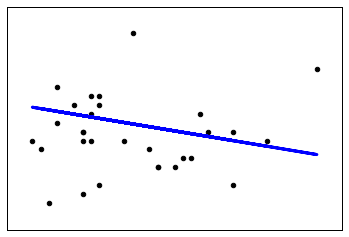

In [102]:
linearReg(iris,0,1)

Coefficients: 
 [[ 1.92345423]]
Mean squared error: 0.67
Variance score: 0.81


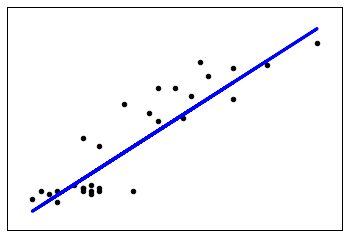

In [103]:
linearReg(iris,0,2)

Coefficients: 
 [[ 0.76288205]]
Mean squared error: 0.15
Variance score: 0.75


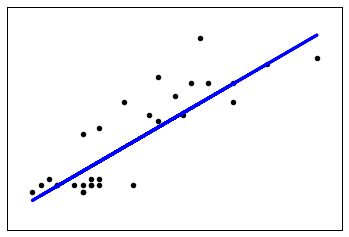

In [104]:
linearReg(iris,0,3)

Coefficients: 
 [[-2.20022821]]
Mean squared error: 4.16
Variance score: -0.19


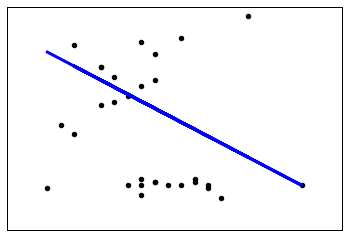

In [105]:
linearReg(iris,1,2)

Coefficients: 
 [[-0.81644094]]
Mean squared error: 0.70
Variance score: -0.15


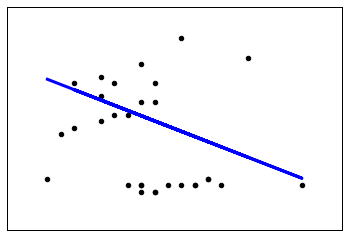

In [106]:
linearReg(iris,1,3)

Coefficients: 
 [[ 0.41193211]]
Mean squared error: 0.02
Variance score: 0.97


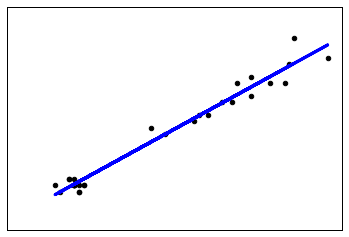

In [107]:
linearReg(iris,2,3)

In [108]:
def two_features_to_one(iris):
    regr = linear_model.LinearRegression()
    for i in range(4):
        for j in range(i+1, 4):
            for k in range(4):
                if k != i and k != j:
                    iris_x = iris.data[:,[i,j]]
                    iris_y = iris.data[:, np.newaxis, k]
                    iris_x_train, iris_x_test, iris_y_train, iris_y_test = train_test_split(iris_x, iris_y, test_size=0.33, random_state=38)
                    regr.fit(iris_x_train, iris_y_train)
                    print('Coefficients: \n', regr.coef_)
                    print("Mean squared error: %.2f"
                          % np.mean((regr.predict(iris_x_test) - iris_y_test) ** 2))
                    print('Variance score: %.2f' % regr.score(iris_x_test, iris_y_test))
                    print('Indexs:', i, j, k)
                    fig = plt.figure()
                    ax = fig.gca(projection='3d')
                    ax.scatter(iris_x_test[:,0], iris_x_test[:,1], iris_y_test)
                    xv, yv = np.meshgrid(iris_x_test, iris_y_test)
                    xv = xv.flatten()
                    yv = yv.flatten()
                    xv = np.reshape(xv, (len(xv)/2, 2))
                    yv = np.reshape(yv, (len(yv)/2, 2))
                    z = np.row_stack((xv,yv))[:2500]
                    ax.plot_wireframe(xv,yv, regr.predict(z))
                    plt.show()

Coefficients: 
 [[ 1.71154289 -1.38596964]]
Mean squared error: 0.48
Variance score: 0.86
Indexs: 0 1 2


/Users/CherylRuo/Documents/anaconda/lib/python3.5/site-packages/numpy/core/fromnumeric.py:225: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)


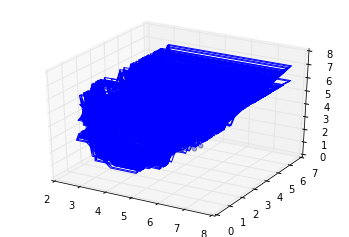

Coefficients: 
 [[ 0.69378444 -0.50504053]]
Mean squared error: 0.15
Variance score: 0.76
Indexs: 0 1 3


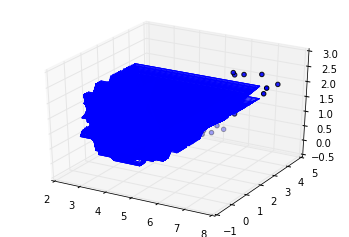

Coefficients: 
 [[ 0.54450033 -0.34496112]]
Mean squared error: 0.12
Variance score: 0.35
Indexs: 0 2 1


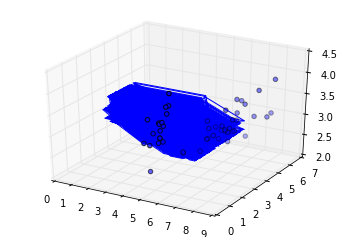

Coefficients: 
 [[-0.10229491  0.45842485]]
Mean squared error: 0.04
Variance score: 0.94
Indexs: 0 2 3


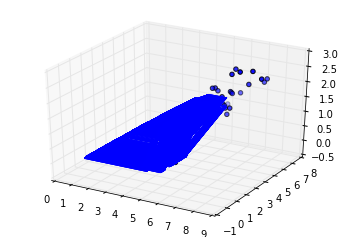

Coefficients: 
 [[ 0.25960326 -0.47083935]]
Mean squared error: 0.16
Variance score: 0.15
Indexs: 0 3 1


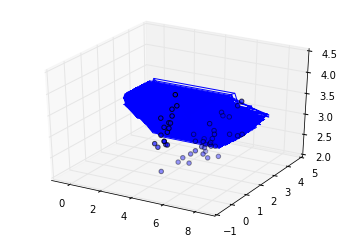

Coefficients: 
 [[ 0.56587797  1.71711048]]
Mean squared error: 0.17
Variance score: 0.95
Indexs: 0 3 2


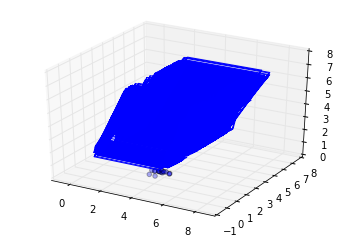

Coefficients: 
 [[ 0.61657124  0.48238005]]
Mean squared error: 0.11
Variance score: 0.85
Indexs: 1 2 0


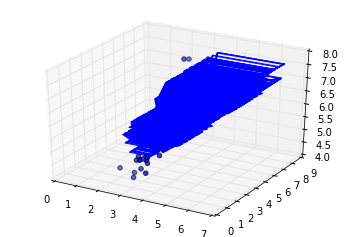

Coefficients: 
 [[ 0.10280465  0.42963224]]
Mean squared error: 0.04
Variance score: 0.94
Indexs: 1 2 3


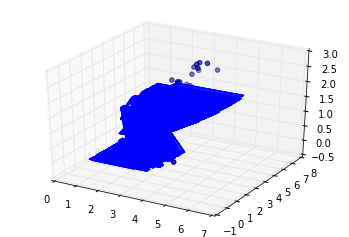

Coefficients: 
 [[ 0.38536536  0.96013791]]
Mean squared error: 0.18
Variance score: 0.76
Indexs: 1 3 0


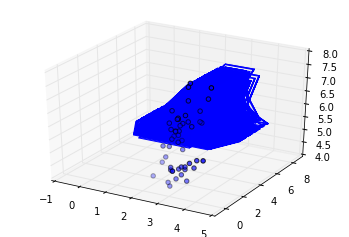

Coefficients: 
 [[-0.39444293  2.10962068]]
Mean squared error: 0.20
Variance score: 0.94
Indexs: 1 3 2


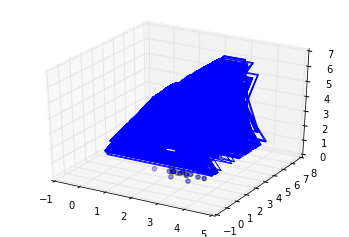

Coefficients: 
 [[ 0.56566428 -0.3830188 ]]
Mean squared error: 0.17
Variance score: 0.78
Indexs: 2 3 0


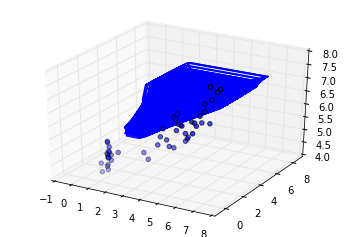

Coefficients: 
 [[-0.26561806  0.33993329]]
Mean squared error: 0.17
Variance score: 0.08
Indexs: 2 3 1


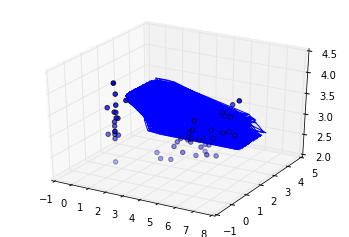

In [109]:
two_features_to_one(iris)

In [110]:
# A plot of the best overall linear regression model you were able to generate using any
# combination of features (including the use of multiple features used in combination to
# predict a single feature), with corresponding model statistics.
def three_features_to_one(iris):
    regr = linear_model.LinearRegression()
    for i in range(4):
        for j in range(i+1, 4):
            for k in range(j+1, 4):
                for w in range(4):
                    if i != w and j !=w and k != w:
                        iris_x = iris.data[:,[i,j,k]]
                        iris_y = iris.data[:, np.newaxis, w]
                        iris_x_train, iris_X_test, iris_y_train, iris_y_test = train_test_split(iris_x, iris_y, test_size=0.5, random_state=38)
                        regr.fit(iris_x_train, iris_y_train)
                        print('Coefficients: \n', regr.coef_)
                        print("Mean squared error: %.2f"
                              % np.mean((regr.predict(iris_X_test) - iris_y_test) ** 2))
                        print('Variance score: %.2f' % regr.score(iris_X_test, iris_y_test))
                        print('Indices: ', i, j, k, w)
                        print("\n")

In [111]:
three_features_to_one(iris)

Coefficients: 
 [[-0.22817917  0.21972682  0.53672354]]
Mean squared error: 0.04
Variance score: 0.94
Indices:  0 1 2 3


Coefficients: 
 [[ 0.73702617 -0.63002571  1.42871565]]
Mean squared error: 0.11
Variance score: 0.97
Indices:  0 1 3 2


Coefficients: 
 [[ 0.56501192 -0.55050682  0.51107266]]
Mean squared error: 0.10
Variance score: 0.54
Indices:  0 2 3 1


Coefficients: 
 [[ 0.63982057  0.72926929 -0.60100234]]
Mean squared error: 0.11
Variance score: 0.86
Indices:  1 2 3 0




In [ ]:
# The best one feature predicts one feature is 2 predicts 3. Mean squared error: 0.02
# Variance score: 0.97
# The best two features predict one feature is 1 and 2 predict 3. Mean squared error: 0.04
# Variance score: 0.94
# The best three features predict one feature is 0, 1, and 2 predict 3. Mean squared error: 0.04
# Variance score: 0.94
# Thus, the best overall linear regression is to use 2 to predict 3.

In [164]:
#Based upon the linear models you generated, which pair of features appear to be most
#predictive for one another? Note that you can answer this question based upon the output
#provided for the linear models.

### Answer: The pair is petal length and petal width. Because their mean squared error is
# the lowest, 0.05, which is much close to 0. And its variance score is the 
# highest, 0.91, which is much close to 1. It means petal shapes are all similar.

In [ ]:
#Suppose you tried to generate a classification model on this dataset, but only after removing
#the feature that you were best able to predict based upon other features. How would
#removing this feature affect the classification performance?

### Answer: Since petal length and petal width values are high-positive
# correlative, we can remove either of them or say generate them into one category. Then the 
# features can be generated into three categories, sepal length, sepal width, and petal shape 
# index.